In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans,AgglomerativeClustering

In [4]:
iris = load_iris()
df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [7]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Text(0, 0.5, 'petal_length')

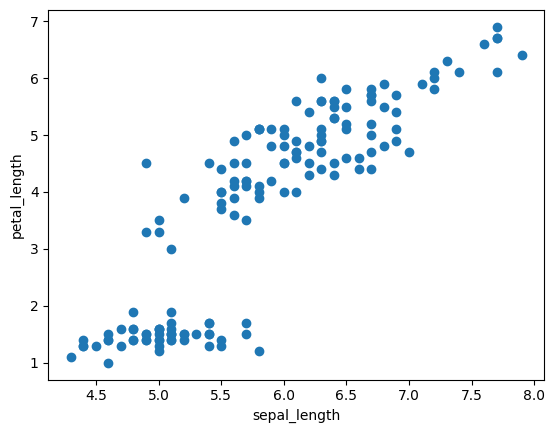

In [8]:
plt.scatter(df['sepal length (cm)'],df['petal length (cm)'])

plt.xlabel('sepal_length')
plt.ylabel('petal_length')

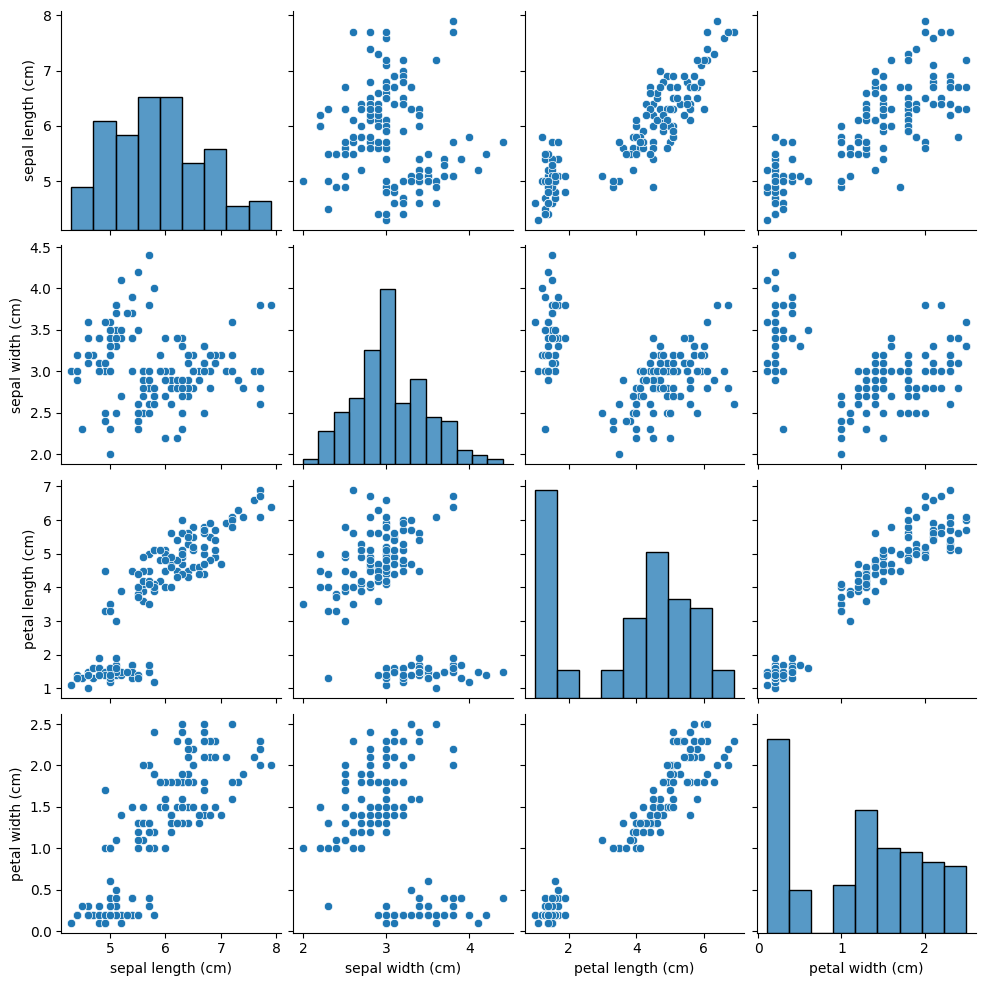

In [9]:
sns.pairplot(df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']])

# K-Means Clustering
K-Means Clustering is an unsupervised machine learning algorithm used to group data points into a predefined number of clusters, denoted as K. The goal is to partition the data such that points within the same cluster are more similar to each other than to those in different clusters.
1. Choose K: Select the number of clusters (K) for the algorithm.
2. Initialize Centroids: Randomly initialize K centroids representing cluster centers.
3. Assign Points to Closest Centroid: Assign each data point to the nearest centroid based on distance.
4. Recompute Centroids: Update each centroid by calculating the average of the points in its cluster.
5. Repeat: Repeat assignment and centroid update steps until centroids stabilize or a maximum number of iterations is reached.

## Why KMeans
K-Means is suitable for the Iris dataset because the dataset contains natural groupings (species) that can be effectively captured by clustering, and since the features in the Iris dataset are continuous and numeric, KMeans can efficiently find spherical clusters that correspond to the species categories.

# Applying KMeans Clustering

In [10]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df)
df['cluster'] = kmeans.labels_

# Visualization of Clusters

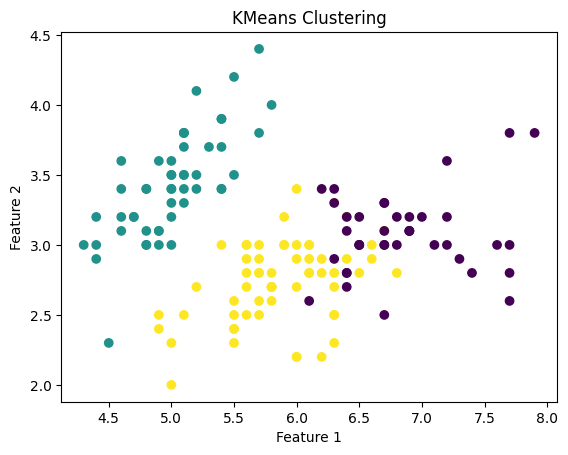

In [11]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['cluster'], cmap='viridis')
plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [12]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


# Heirarchical Clustering
Hierarchical clustering is another popular unsupervised machine learning algorithm used for clustering, which builds a hierarchy of clusters. Unlike K-Means, hierarchical clustering does not require specifying the number of clusters in advance. It operates by either merging smaller clusters into larger ones or splitting larger clusters into smaller ones.
## Types of Hierarchical Clustering:
Agglomerative (Bottom-Up) Clustering and Divisive (Top-Down) Clustering
## How Heirarchical Clustering Suitable for Iris Dataset 
Hierarchical clustering is suitable for the Iris dataset because it captures natural relationships between species without needing a predefined number of clusters, and it can represent these relationships in a dendrogram, which visually shows how the species group together based on their features.

In [13]:
agg_clustering = AgglomerativeClustering(n_clusters=3)
df['agg_cluster'] = agg_clustering.fit_predict(df.iloc[:, :-1])

# Visualisation

In [15]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

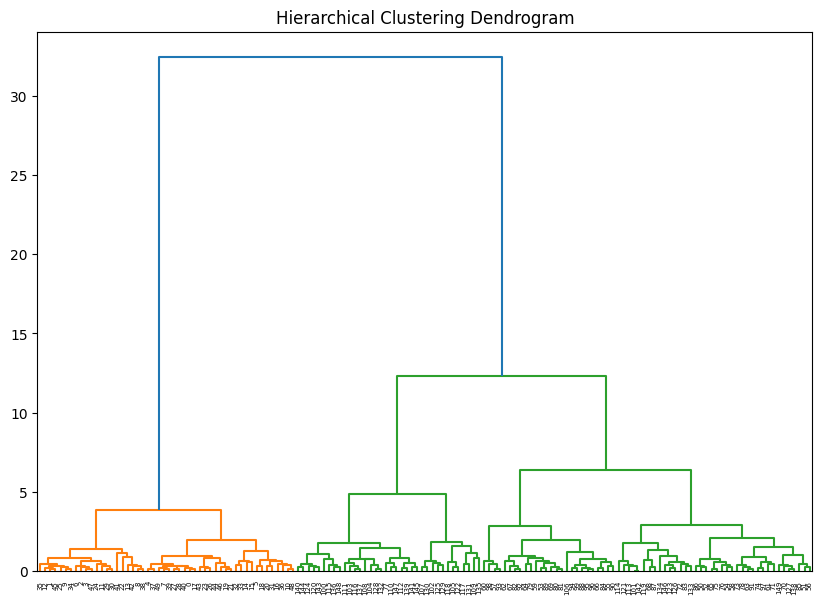

In [16]:
linked = linkage(df.iloc[:, :-2], method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()